<h1 style="text-align: center;"><b>120 years of Olympic history: athletes and results</b></h1>

<h3 style="text-align: center;"><b>Shijie Cheng</b></h3>

<div style="text-align: center;">
    <img src="dataset-cover.jpg"/>
</div>

## Motivation

The Olympic Games stand as a testament to human athletic achievement, international cooperation, and the unifying power of sport. Spanning over a century, the Games have witnessed the triumphs and challenges of generations, making Olympic history a rich data that mirrors global cultural and social developments.

The project, "Data Visualization of 120 Years of Olympic History: Athletes and Results," is conceived out of a desire to unlock the stories within this vast historical dataset and present them in an accessible and engaging manner. 

## Introduction

For the project on the 120-year history of the Olympic Games, we aim to explore development history of the Games through data visualization. Utilizing two comprehensive datasets from Kaggle, we plan to examine the evolution of the Olympics, focusing on medal distribution, the prominence of sports, national performances, and athlete demographics.

You can find the github page of this project [here](https://garry20010514.github.io/cmps3160/).

## Datasets Overview

* **Datasets source**: [120 years of Olympic history: athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data)
* **athlete_events.csv**: Contains records of individual athletes' performances across different Olympic Games, including details like the athlete's name, sex, age, team, NOC code, the game year, sport, event, and medals won. 
* **noc_regions.csv**: Provides a mapping between the NOC codes and the corresponding countries or regions, facilitating an understanding of the athletes' national affiliations.

## Questions and Objectives

1. How have the total medals accumulated by each country changed over time?
2. Which sports have produced the most gold medals, and how does this vary by country?
3. Analyze trends in athlete participation, including the percentage of female participants and the average physique of athletes across sports.
4. Investigate the dominant performances of countries such as China and the USA in the Olympic Games.
5. Identify sports that have been historically dominated by a single country.

# Extraction, Transform, and Load (ETL)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the data**

In [2]:
athlete_data = pd.read_csv('./athlete_events.csv')
noc_region = pd.read_csv('./noc_regions.csv')

In [3]:
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Then, we need to merge these two datasets so that the athlete data is associated with the country they represent

In [5]:
data = pd.merge(athlete_data, noc_region, on='NOC', how='left')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Next, I wanted to see the difference between the "NOC", "Team" and "region" column.

In [6]:
print(data["NOC"].unique())
print(data["region"].unique())
print(data["Team"].unique())

['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 'BAH' 'GUA' 'SRB' 'I

In this table, you can see that these columns are redundant. The columns "Team", "NOC", and "region" all mean the country of players, so in order to tidy up our dataset, we just need to keep the "region" column.

In [7]:
data.drop(['NOC', 'Team'], axis=1, inplace = True)
data.head()

,ID,Name,Sex,Age,Height,Weight,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Then, in the cleaning proccess I wanted to identify if the "notes" column needed any tidying, since it doesn't look like this column of data is relevant to the topic of our project.

In [8]:
data["notes"].isnull().sum()

266077

In [9]:
data["notes"].unique()

array([nan, 'United Arab Republic', 'North Yemen', 'Virgin Islands',
       'Turks and Caicos Islands', 'Trinidad and Tobago',
       'Netherlands Antilles', 'South Yemen', 'Australasia',
       'Serbia and Montenegro', 'Individual Olympic Athletes',
       'Yugoslavia', 'Refugee Olympic Team', 'Crete',
       'Antigua and Barbuda', 'Hong Kong', 'Bohemia',
       'West Indies Federation', 'North Borneo', 'Unknown', 'Tuvalu',
       'Newfoundland'], dtype=object)

We can see that there is too much null data in this column and the remaining data is not helpful for our analysis, so we can remove this column.

In [10]:
data.drop('notes', axis=1, inplace = True)
data.head()

,ID,Name,Sex,Age,Height,Weight,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


# Exploratory Data Analysis (EDA)

In [11]:
import pyecharts
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode

## Cumulative Medal Count
Separate statistics for Summer & Winter Olympics

* The Summer Olympics started in 1896 in Athens;

* The Winter Olympics started in 1924 in Munich;

In [12]:
medal_data = data.groupby(['Year', 'Season', 'region', 
                                        'Medal'])['Event'].nunique().reset_index()
medal_data.columns = ['Year', 'Season', 'region', 'Medal', 'Nums']                                      
medal_data = medal_data.sort_values(by="Year" , ascending=True) 

In [13]:
def medal_stat(year, season='Summer'):
    t_data = medal_data[(medal_data['Year'] <= year) & (medal_data['Season'] == season)]
    t_data = t_data.groupby(['region', 'Medal'])['Nums'].sum().reset_index()
    t_data = t_data.set_index(['region', 'Medal']).unstack().reset_index().fillna(0, inplace=False)
    t_data = sorted([(row['region'][0], int(row['Nums']['Gold']), int(row['Nums']['Silver']), int(row['Nums']['Bronze'])) 
                                for _, row in t_data.iterrows()], key=lambda x: x[1]+x[2]+x[3], reverse=True)[:20] 
    return t_data

#### Cumulative Medal Counts for Summer Olympics by Country

* As of the 2016 Summer Olympics, **the United States and Russia have won 2,544 and 1,577 medals, respectively,** placing them in first and second place;

* China, due to its late participation in the Olympics, **has accumulated 545 medals as of 2016,** placing it in seventh place;

In [14]:
year_list = sorted(list(set(medal_data['Year'].to_list())), reverse=True)

tl = Timeline(init_opts=opts.InitOpts(theme='dark', width='1000px', height='1000px'))
tl.add_schema(is_timeline_show=True,is_rewind_play=True, is_inverse=False,
             label_opts=opts.LabelOpts(is_show=False))

for year in year_list:
    t_data = medal_stat(year)[::-1]
    bar = (
        Bar(init_opts=opts.InitOpts())
            .add_xaxis([x[0] for x in t_data])
           .add_yaxis("Bronze Medal🥉", [x[3] for x in t_data], 
                        stack='stack1',
                        itemstyle_opts=opts.ItemStyleOpts(border_color='rgb(220,220,220)',color='rgb(218,165,32)'))
            .add_yaxis("Silver Medal🥈", [x[2] for x in t_data], 
                        stack='stack1',
                        itemstyle_opts=opts.ItemStyleOpts(border_color='rgb(220,220,220)',color='rgb(192,192,192)'))
            .add_yaxis("Gold Medal🏅️", [x[1] for x in t_data], 
                        stack='stack1',
                        itemstyle_opts=opts.ItemStyleOpts(border_color='rgb(220,220,220)',color='rgb(255,215,0)'))
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                       position='insideRight',
                                                       font_style='italic'),)
            .set_global_opts(
                xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                legend_opts=opts.LegendOpts(is_show=True),
                graphic_opts=[opts.GraphicGroup(graphic_item=opts.GraphicItem(
                                                   rotation=JsCode("Math.PI / 4"),
                                                   bounding="raw",
                                                   right=110,
                                                   bottom=110,
                                                   z=100),
                                               children=[
                                                   opts.GraphicRect(
                                                       graphic_item=opts.GraphicItem(
                                                           left="center", top="center", z=100
                                                       ),
                                                       graphic_shape_opts=opts.GraphicShapeOpts(
                                                           width=400, height=50
                                                       ),
                                                       graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                                           fill="rgba(0,0,0,0.3)"
                                                       ),
                                                   ),
                                                   opts.GraphicText(
                                                       graphic_item=opts.GraphicItem(
                                                           left="center", top="center", z=100
                                                       ),
                                                       graphic_textstyle_opts=opts.GraphicTextStyleOpts(
                                                           text=year,
                                                           font="bold 26px Microsoft YaHei",
                                                           graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                                               fill="#fff"
                                                           ),
                                                       ),
                                                   ),
                                               ],
                                            )
                                    ],)
        .reversal_axis())
    tl.add(bar, year)

tl.render_notebook()


#### Cumulative Medal Counts for Winter Olympics by Country

* As of the 2014 Winter Olympics, **Germany and Russia have won 377 and 339 medals, respectively,** placing them in first and second place, while **the United States is in the third place**;

* China isn't very good at Winter Olympics events and **has only won 52 medals as of 2014,** placing it in 13th place;

In [15]:
year_list = sorted(list(set(medal_data['Year'][medal_data.Season=='Winter'].to_list())), reverse=True)

tl = Timeline(init_opts=opts.InitOpts(theme='dark', width='1000px', height='1000px'))
tl.add_schema(is_timeline_show=True,is_rewind_play=True, is_inverse=False,
             label_opts=opts.LabelOpts(is_show=False))

for year in year_list:
    t_data = medal_stat(year, 'Winter')[::-1]
    bar = (
        Bar(init_opts=opts.InitOpts(theme='dark'))
            .add_xaxis([x[0] for x in t_data])
            .add_yaxis("Bronze Medal🥉", [x[3] for x in t_data], 
                        stack='stack1',
                        itemstyle_opts=opts.ItemStyleOpts(border_color='rgb(220,220,220)',color='rgb(218,165,32)'))
            .add_yaxis("Silver Medal🥈", [x[2] for x in t_data], 
                        stack='stack1',
                        itemstyle_opts=opts.ItemStyleOpts(border_color='rgb(220,220,220)',color='rgb(192,192,192)'))
            .add_yaxis("Gold Medal🏅️", [x[1] for x in t_data], 
                        stack='stack1',
                        itemstyle_opts=opts.ItemStyleOpts(border_color='rgb(220,220,220)',color='rgb(255,215,0)'))
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                       position='insideRight',
                                                       font_style='italic'),)
            .set_global_opts(
                xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                legend_opts=opts.LegendOpts(is_show=True),
                graphic_opts=[opts.GraphicGroup(graphic_item=opts.GraphicItem(
                                                   rotation=JsCode("Math.PI / 4"),
                                                   bounding="raw",
                                                   right=110,
                                                   bottom=110,
                                                   z=100),
                                               children=[
                                                   opts.GraphicRect(
                                                       graphic_item=opts.GraphicItem(
                                                           left="center", top="center", z=100
                                                       ),
                                                       graphic_shape_opts=opts.GraphicShapeOpts(
                                                           width=400, height=50
                                                       ),
                                                       graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                                           fill="rgba(0,0,0,0.3)"
                                                       ),
                                                   ),
                                                   opts.GraphicText(
                                                       graphic_item=opts.GraphicItem(
                                                           left="center", top="center", z=100
                                                       ),
                                                       graphic_textstyle_opts=opts.GraphicTextStyleOpts(
                                                           text=year,
                                                           font="bold 26px Microsoft YaHei",
                                                           graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                                               fill="#fff"
                                                           ),
                                                       ),
                                                   ),
                                               ],
                                            )
                                    ],)
            .reversal_axis())
    tl.add(bar, year)

tl.render_notebook()

## Number of gold medals produced by each sport
Based on 2016 Summer Olympics and 2014 Winter Olympics statistics;

* 🏃 **Athletics & 🏊‍ Swimming are the big sports, producing 47 and 34 gold medals respectively at the 2016 Summer Olympics;**

* Winter Olympics have a more even distribution of medals compared to the Summer Olympics

In [16]:
background_color_js = """new echarts.graphic.RadialGradient(0.5, 0.5, 1, [{
                                        offset: 0,
                                        color: '#696969'
                                    }, {
                                        offset: 1,
                                        color: '#000000'
                                    }])"""

tab = Tab()
temp = data[(data['Medal']=='Gold') & (data['Year']==2016) & (data['Season']=='Summer')]

event_medal = temp.groupby(['Sport'])['Event'].nunique().reset_index()
event_medal.columns = ['Sport', 'Nums']                                      
event_medal = event_medal.sort_values(by="Nums" , ascending=False) 


pie = (Pie(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1000px', height='800px'))
       .add('Gold Medal🏅️', [(row['Sport'], row['Nums']) for _, row in event_medal.iterrows()],
            radius=["30%", "75%"],
            rosetype="radius")
       .set_global_opts(title_opts=opts.TitleOpts(title="Proportion of Gold Medals Produced by Sport at the 2016 Summer Olympics", 
                                                  pos_left="center",
                                                  title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20),     ),
                        legend_opts=opts.LegendOpts(is_show=False))
       .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"),
                        tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"),)
      )
tab.add(pie, '2016 Summer Olympics')

temp = data[(data['Medal']=='Gold') & (data['Year']==2014) & (data['Season']=='Winter')]

event_medal = temp.groupby(['Sport'])['Event'].nunique().reset_index()
event_medal.columns = ['Sport', 'Nums']                                      
event_medal = event_medal.sort_values(by="Nums" , ascending=False) 


pie = (Pie(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1000px', height='800px'))
       .add('Gold Medal🏅️', [(row['Sport'], row['Nums']) for _, row in event_medal.iterrows()],
            radius=["30%", "75%"],
            rosetype="radius")
       .set_global_opts(title_opts=opts.TitleOpts(title="Proportion of Gold Medals Produced by Sport at the 2014 Winter Olympics", 
                                                  pos_left="center",
                                                  title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20),     ),
                        legend_opts=opts.LegendOpts(is_show=False))
       .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"),
                        tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        ),)
      )
tab.add(pie, '2014 Winter Olympics')
tab.render_notebook()

## Athlete Level
#### Trends in number of participants over the years
* In terms of numbers, the number of participants in each Summer Olympics is 4-8 times higher than in the Winter Olympics.

* The overall number of participants is trending upwards, but there have been fluctuations due to historical reasons, such as the boycott of the 1980 Moscow Olympics by 65 nations.

In [17]:
athlete = data.groupby(['Year', 'Season'])['Name'].nunique().reset_index()
athlete.columns = ['Year', 'Season', 'Nums']                                      
athlete = athlete.sort_values(by="Year" , ascending=True) 

x_list, y1_list, y2_list = [], [], []

for _, row in athlete.iterrows():
    x_list.append(str(row['Year']))
    if row['Season'] == 'Summer':
        y1_list.append(row['Nums'])
        y2_list.append(None)
    else:
        y2_list.append(row['Nums'])
        y1_list.append(None)

background_color_js = (
    "new echarts.graphic.LinearGradient(1, 1, 0, 0, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#FF6347'}], false)"
)

       
line = (
    Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1000px', height='600px'))
    .add_xaxis(x_list)
    .add_yaxis("Summer Olympics", 
        y1_list, 
        is_smooth=True, 
        is_connect_nones=True,
        symbol="circle",
        symbol_size=6,
        linestyle_opts=opts.LineStyleOpts(color="#fff"),
        label_opts=opts.LabelOpts(is_show=False, position="top", color="white"),
        itemstyle_opts=opts.ItemStyleOpts(
            color="green", border_color="#fff", border_width=3),
        tooltip_opts=opts.TooltipOpts(is_show=True))
    .add_yaxis("Winter Olympics", 
        y2_list, 
        is_smooth=True, 
        is_connect_nones=True, 
        symbol="circle",
        symbol_size=6,
        linestyle_opts=opts.LineStyleOpts(color="#FF4500"),
        label_opts=opts.LabelOpts(is_show=False, position="top", color="white"),
        itemstyle_opts=opts.ItemStyleOpts(
            color="red", border_color="#fff", border_width=3),
        tooltip_opts=opts.TooltipOpts(is_show=True))
    .set_series_opts(
        markarea_opts=opts.MarkAreaOpts(
            label_opts=opts.LabelOpts(is_show=True, position="bottom", color="white"),
            data=[
                opts.MarkAreaItem(name="World War I", x=(1914, 1918)),
                opts.MarkAreaItem(name="World War II", x=(1939, 1945)),
            ]
        )
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Number of Participants in Previous Olympic Games",
                                                pos_left="center",
                                                title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20),),
                     legend_opts=opts.LegendOpts(is_show=True, pos_top='5%',
                                                 textstyle_opts=opts.TextStyleOpts(color="white", font_size=12)),
                     xaxis_opts=opts.AxisOpts(type_="value",
                                                min_=1904,
                                                max_=2016,
                                                boundary_gap=False,
                                                axislabel_opts=opts.LabelOpts(margin=30, color="#ffffff63",
                                                                              formatter=JsCode("""function (value) 
                                                                               {return value;}""")),
                                                axisline_opts=opts.AxisLineOpts(is_show=False),
                                                axistick_opts=opts.AxisTickOpts(
                                                    is_show=True,
                                                    length=25,
                                                    linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                                                ),
                                                splitline_opts=opts.SplitLineOpts(
                                                    is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                                                ),
                                            ),
                    yaxis_opts=opts.AxisOpts(
                                            type_="value",
                                            position="right",
                                            axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63"),
                                            axisline_opts=opts.AxisLineOpts(
                                                linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
                                            ),
                                            axistick_opts=opts.AxisTickOpts(
                                                is_show=True,
                                                length=15,
                                                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                                            ),
                                            splitline_opts=opts.SplitLineOpts(
                                                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                                            ),
                                        ),)
)

line.render_notebook()

#### Trends in the percentage of female athletes over the years

In the beginning, the Olympics was basically a "man's sport" with only single digit female athletes. However in recent Olympics, the number of male and female participants has basically equalized;

In [18]:
m_data = data[data.Sex=='M'].groupby(['Year', 'Season'])['Name'].nunique().reset_index()
m_data.columns = ['Year', 'Season', 'M-Nums']                                      
m_data = m_data.sort_values(by="Year" , ascending=True) 

f_data = data[data.Sex=='F'].groupby(['Year', 'Season'])['Name'].nunique().reset_index()
f_data.columns = ['Year', 'Season', 'F-Nums']                                      
f_data = f_data.sort_values(by="Year" , ascending=True) 

t_data = pd.merge(m_data, f_data, on=['Year', 'Season'])
t_data['F-rate'] = round(t_data['F-Nums'] / (t_data['F-Nums']  + t_data['M-Nums'] ), 4)


x_list, y1_list, y2_list = [], [], []

for _, row in t_data.iterrows():
    x_list.append(str(row['Year']))
    if row['Season'] == 'Summer':
        y1_list.append(row['F-rate'])
        y2_list.append(None)
    else:
        y2_list.append(row['F-rate'])
        y1_list.append(None)

background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#FF6347'}], false)"
)

       
line = (
    Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1000px', height='600px'))
    .add_xaxis(x_list)
    .add_yaxis("Summer Olympics", 
        y1_list, 
        is_smooth=True, 
        is_connect_nones=True,
        symbol="circle",
        symbol_size=6,
        linestyle_opts=opts.LineStyleOpts(color="#fff"),
        label_opts=opts.LabelOpts(is_show=False, position="top", color="white"),
        itemstyle_opts=opts.ItemStyleOpts(color="green", border_color="#fff", border_width=3),
        tooltip_opts=opts.TooltipOpts(is_show=True),)
    .add_yaxis("Winter Olympics", 
        y2_list, 
        is_smooth=True, 
        is_connect_nones=True, 
        symbol="circle",
        symbol_size=6,
        linestyle_opts=opts.LineStyleOpts(color="#FF4500"),
        label_opts=opts.LabelOpts(is_show=False, position="top", color="white"),
        itemstyle_opts=opts.ItemStyleOpts(color="red", border_color="#fff", border_width=3),
        tooltip_opts=opts.TooltipOpts(is_show=True),)
    .set_series_opts(tooltip_opts=opts.TooltipOpts(trigger="item", formatter=JsCode("""function (params) 
                                                                           {return params.data[0]+ ': ' + Number(params.data[1])*100 +'%';}""")),)
    .set_global_opts(title_opts=opts.TitleOpts(title="Trends in the Percentage of Women Participating in Previous Olympic Games",
                                                pos_left="center",
                                                title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20),),
                     legend_opts=opts.LegendOpts(is_show=True, pos_top='5%',
                                                 textstyle_opts=opts.TextStyleOpts(color="white", font_size=12)),
                     xaxis_opts=opts.AxisOpts(type_="value",
                                                min_=1904,
                                                max_=2016,
                                                boundary_gap=False,
                                                axislabel_opts=opts.LabelOpts(margin=30, color="#ffffff63",
                                                                              formatter=JsCode("""function (value) 
                                                                               {return value}""")),
                                                axisline_opts=opts.AxisLineOpts(is_show=False),
                                                axistick_opts=opts.AxisTickOpts(
                                                    is_show=True,
                                                    length=25,
                                                    linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                                                ),
                                                splitline_opts=opts.SplitLineOpts(
                                                    is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                                                ),
                                            ),
                    yaxis_opts=opts.AxisOpts(
                                            type_="value",
                                            position="right",
                                            axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63",
                                                                          formatter=JsCode("""function (value) 
                                                                           {return Number(value *100)+'%';}""")),
                                            axisline_opts=opts.AxisLineOpts(
                                                linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
                                            ),
                                            axistick_opts=opts.AxisTickOpts(
                                                is_show=True,
                                                length=15,
                                                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                                            ),
                                            splitline_opts=opts.SplitLineOpts(
                                                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                                            ),
                                        ),)
)

line.render_notebook()

#### Athletes with the most gold medals
* At the top of the list is the American swimmer **Phelps** who has won a total of **23** gold medals as of the 2016 Olympics;
* Bolt has accumulated 8 Olympic gold medals;

In [19]:
temp = data[(data['Medal']=='Gold')]

athlete = temp.groupby(['Name'])['Medal'].count().reset_index()
athlete.columns = ['Name', 'Nums']                                      
athlete = athlete.sort_values(by="Nums" , ascending=True)


background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 1, 1, "
    "[{offset: 0, color: '#FFFFFF'}, {offset: 1, color: '#FF6347'}], false)"
)

pb = (
    PictorialBar(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1000px', height='800px'))
    .add_xaxis([x.replace(' ','\n') for x in athlete['Name'].tail(10).tolist()])
    .add_yaxis(
        "",
        athlete['Nums'].tail(10).tolist(),
        label_opts=opts.LabelOpts(is_show=False),
        symbol_size=25,
        symbol_repeat='fixed',
        symbol_offset=[0, 0],
        is_symbol_clip=True,
        symbol='image://https://cdn.kesci.com/upload/image/q8f8otrlfc.png')
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Athletes with the Most Gold Medals", pos_left='center',
                                  title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20),),
        xaxis_opts=opts.AxisOpts(is_show=False,),
        yaxis_opts=opts.AxisOpts(
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(opacity=0)
            ),
        ),
    ))

pb.render_notebook()

#### Percentage of winning gold medals/any medals
Phelps won so many gold medals, but how hard is it to win a gold medal?

* **In the entire history of the Olympic Games (including the Summer and Winter Olympics), the number of participants is 134,732, and the number of athletes who have won gold medals is only 10,413, which is 7.7%.**

* The number of athletes who have won medals (including gold, silver and bronze) is 28,202, accounting for 20.93%;


In [20]:
total_athlete = len(set(data['Name']))
medal_athlete = len(set(data['Name'][data['Medal'].isin(['Gold', 'Silver', 'Bronze'])]))
gold_athlete = len(set(data['Name'][data['Medal']=='Gold']))


l1 = Liquid(init_opts=opts.InitOpts(theme='dark', width='1000px', height='800px'))
l1.add("any medals", [medal_athlete/total_athlete], 
            center=["70%", "50%"],
            label_opts=opts.LabelOpts(font_size=50,
                formatter=JsCode(
                    """function (param) {
                            return (Math.floor(param.value * 10000) / 100) + '%';
                        }"""),
                position="inside",
            ))
l1.set_global_opts(title_opts=opts.TitleOpts(title="Percentage of winning any medals", pos_left='52%', pos_top='8%'))
l1.set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=False))

l2 = Liquid(init_opts=opts.InitOpts(theme='dark', width='1000px', height='800px'))
l2.add("golden medals",
        [gold_athlete/total_athlete],
        center=["25%", "50%"],
        label_opts=opts.LabelOpts(font_size=50,
            formatter=JsCode(
                """function (param) {
                        return (Math.floor(param.value * 10000) / 100) + '%';
                    }"""),
            position="inside",
        ),)
l2.set_global_opts(title_opts=opts.TitleOpts(title="Percentage of winning gold medals", pos_left='6%', pos_top='8%'))
l2.set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=False))


grid = Grid().add(l1, grid_opts=opts.GridOpts()).add(l2, grid_opts=opts.GridOpts())
grid.render_notebook()

#### Athletes' average fitness data
The statistics are based on different sports

* The sport with the highest average height of athletes is basketball, with the average height of women reaching 182 cm and the average height of men reaching 194 cm.

* Among the men's sports, tug-of-war is the sport with the highest average weight of athletes, with an average weight of 96 kg.

* The sport with the oldest average age of athletes is art competition, with an average age of 46 years. Apart from that, the most aged sports are equestrianism and shooting, with the average age of men being 34.4 and 34.2 years, and the average age of women being 34.22 and 29.12 years, respectively.

In [21]:
tool_js = """function (param) {return param.data[2] +'<br/>' 
            +'Average Weight： '+Number(param.data[0]).toFixed(2)+' kg<br/>'
            +'Average Height： '+Number(param.data[1]).toFixed(2)+' cm<br/>'
            +'Average Age： '+Number(param.data[3]).toFixed(2);}"""

background_color_js = (
    "new echarts.graphic.LinearGradient(1, 0, 0, 1, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#FF6347'}], false)"
)


temp_data = data[data['Sex']=='M'].groupby(['Sport'])['Age', 'Height', 'Weight'].mean().reset_index().dropna(how='any')

scatter = (Scatter(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1000px', height='600px'))
           .add_xaxis(temp_data['Weight'].tolist())
           .add_yaxis("Male", [[row['Height'], row['Sport'], row['Age']] for _, row in temp_data.iterrows()],
                      color=JsCode("""new echarts.graphic.RadialGradient(0.4, 0.3, 1, [{
                                        offset: 0,
                                        color: 'rgb(129, 227, 238)'
                                    }, {
                                        offset: 1,
                                        color: 'rgb(25, 183, 207)'
                                    }])"""))
           .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
           .set_global_opts(
               title_opts=opts.TitleOpts(title="Average Height, Weight and Age of Athletes in Each Sport",pos_left="center",
                                         title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20)),
               legend_opts=opts.LegendOpts(is_show=True, pos_top='5%',
                                           textstyle_opts=opts.TextStyleOpts(color="white", font_size=12)),
               tooltip_opts = opts.TooltipOpts(formatter=JsCode(tool_js)),
               xaxis_opts=opts.AxisOpts(
                   name='Weight/kg',
                   type_="value", 
                   is_scale=True,
                   axislabel_opts=opts.LabelOpts(margin=30, color="white"),
                   axisline_opts=opts.AxisLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")),
                   axistick_opts=opts.AxisTickOpts(is_show=True, length=25,
                                                   linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")),
                   splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                                                )),
               yaxis_opts=opts.AxisOpts(
                   name='Height/cm',
                   type_="value",
                   is_scale=True,
                   axislabel_opts=opts.LabelOpts(margin=30, color="white"),
                   axisline_opts=opts.AxisLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")),
                   axistick_opts=opts.AxisTickOpts(is_show=True, length=25,
                                                   linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")),
                   splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                                                )),
               visualmap_opts=opts.VisualMapOpts(is_show=False, type_='size', range_size=[5,50], min_=10, max_=40)
    ))

temp_data = data[data['Sex']=='F'].groupby(['Sport'])['Age', 'Height', 'Weight'].mean().reset_index().dropna(how='any')
    
scatter1 = (Scatter()
           .add_xaxis(temp_data['Weight'].tolist())
           .add_yaxis("Female", [[row['Height'], row['Sport'], row['Age']] for _, row in temp_data.iterrows()],
                     itemstyle_opts=opts.ItemStyleOpts(
                         color=JsCode("""new echarts.graphic.RadialGradient(0.4, 0.3, 1, [{
                                        offset: 0,
                                        color: 'rgb(251, 118, 123)'
                                    }, {
                                        offset: 1,
                                        color: 'rgb(204, 46, 72)'
                                    }])""")))
           .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        )
scatter.overlap(scatter1)
scatter.render_notebook() 


C:\Users\11747\AppData\Local\Temp\ipykernel_29440\2640146933.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_data = data[data['Sex']=='M'].groupby(['Sport'])['Age', 'Height', 'Weight'].mean().reset_index().dropna(how='any')
C:\Users\11747\AppData\Local\Temp\ipykernel_29440\2640146933.py:54: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_data = data[data['Sex']=='F'].groupby(['Sport'])['Age', 'Height', 'Weight'].mean().reset_index().dropna(how='any')


## China's Olympic performance

In [22]:
CN_data = data[data.region=='China']
CN_data.head()

,ID,Name,Sex,Age,Height,Weight,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
1072,602,Abudoureheman,M,22.0,182.0,75.0,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
2611,1463,Ai Linuer,M,25.0,160.0,62.0,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


#### Number of participants in previous Olympic Games

In [23]:
background_color_js = (
    "new echarts.graphic.LinearGradient(1, 0, 0, 1, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#FF6347'}], false)"
)



athlete = CN_data.groupby(['Year', 'Season'])['Name'].nunique().reset_index()
athlete.columns = ['Year', 'Season', 'Nums']                                      
athlete = athlete.sort_values(by="Year" , ascending=False) 


        
s_bar = (
        Bar(init_opts=opts.InitOpts(theme='dark', width='1000px', height='300px'))
        .add_xaxis([row['Year'] for _, row in athlete[athlete.Season=='Summer'].iterrows()])
        .add_yaxis("Number of athletes", [row['Nums'] for _, row in athlete[athlete.Season=='Summer'].iterrows()],
                  category_gap='40%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 1,
                                                 color: '#00BFFF'
                                             }, {
                                                 offset: 0,
                                                 color: '#32CD32'
                                             }])""")))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                position='top',
                                                font_style='italic'))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Number of Chinese Olympic Athletes - Summer Olympics", pos_left='center'),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
            legend_opts=opts.LegendOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63")),
            graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    id_="logo", right=0, top=0, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    image="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586619952245&di=981a36305048f93eec791980acc99cf7&imgtype=0&src=http%3A%2F%2Fimg5.mtime.cn%2Fmg%2F2017%2F01%2F06%2F172210.42721559.jpg",
                    width=1000,
                    height=600,
                    opacity=0.6,),
            )
        ],)
        )

        
w_bar = (
        Bar(init_opts=opts.InitOpts(theme='dark',width='1000px', height='300px'))
        .add_xaxis([row['Year'] for _, row in athlete[athlete.Season=='Winter'].iterrows()])
        .add_yaxis("Number of athletes", [row['Nums'] for _, row in athlete[athlete.Season=='Winter'].iterrows()],
                  category_gap='50%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 1,
                                                 color: '#00BFFF'
                                             }, {
                                                 offset: 0.8,
                                                 color: '#FFC0CB'
                                             }, {
                                                 offset: 0,
                                                 color: '#40E0D0'
                                             }])""")))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                position='top',
                                                font_style='italic'))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Number of Chinese Olympic Athletes - Winter Olympics", pos_left='center'),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
            legend_opts=opts.LegendOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63")),
            graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    id_="logo", right=0, top=-300, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    image="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586619952245&di=981a36305048f93eec791980acc99cf7&imgtype=0&src=http%3A%2F%2Fimg5.mtime.cn%2Fmg%2F2017%2F01%2F06%2F172210.42721559.jpg",
                    width=1000,
                    height=600,
                    opacity=0.6,),
            )
        ],)
        )


page = (
    Page()
    .add(s_bar,)
    .add(w_bar,)
)
page.render_notebook()

#### Number of medals in previous Olympics

In [24]:
background_color_js = (
    "new echarts.graphic.LinearGradient(1, 0, 0, 1, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#FF6347'}], false)"
)



CN_medals = CN_data.groupby(['Year', 'Season', 'Medal'])['Event'].nunique().reset_index()
CN_medals.columns = ['Year', 'Season', 'Medal', 'Nums']                                      
CN_medals = CN_medals.sort_values(by="Year" , ascending=False) 


        
s_bar = (
        Bar(init_opts=opts.InitOpts(theme='dark', width='1000px', height='300px'))
        .add_xaxis(sorted(list(set([row['Year'] for _, row in CN_medals[CN_medals.Season=='Summer'].iterrows()])), reverse=True))
        .add_yaxis("Gold Medals", [row['Nums'] for _, row in CN_medals[(CN_medals.Season=='Summer') & (CN_medals.Medal=='Gold')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#FFD700'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .add_yaxis("Silver Medals", [row['Nums'] for _, row in CN_medals[(CN_medals.Season=='Summer') & (CN_medals.Medal=='Silver')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#C0C0C0'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .add_yaxis("Bronze Medals", [row['Nums'] for _, row in CN_medals[(CN_medals.Season=='Summer') & (CN_medals.Medal=='Bronze')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#DAA520'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                position='top',
                                                font_style='italic'))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="China's Olympic medals in the past years - Summer Olympics", pos_left='center'),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
            legend_opts=opts.LegendOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63")),
            graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    id_="logo", right=0, top=0, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    image="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586619952245&di=981a36305048f93eec791980acc99cf7&imgtype=0&src=http%3A%2F%2Fimg5.mtime.cn%2Fmg%2F2017%2F01%2F06%2F172210.42721559.jpg",
                    width=1000,
                    height=600,
                    opacity=0.6,),
            )
        ],)
        )

        
w_bar = (
        Bar(init_opts=opts.InitOpts(theme='dark', width='1000px', height='300px'))
        .add_xaxis(sorted(list(set([row['Year'] for _, row in CN_medals[CN_medals.Season=='Winter'].iterrows()])), reverse=True))
        .add_yaxis("Gold Medals", [row['Nums'] for _, row in CN_medals[(CN_medals.Season=='Winter') & (CN_medals.Medal=='Gold')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#FFD700'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .add_yaxis("Silver Medals", [row['Nums'] for _, row in CN_medals[(CN_medals.Season=='Winter') & (CN_medals.Medal=='Silver')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#C0C0C0'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .add_yaxis("Bronze Medals", [row['Nums'] for _, row in CN_medals[(CN_medals.Season=='Winter') & (CN_medals.Medal=='Bronze')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#DAA520'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                position='top',
                                                font_style='italic'))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="China's Olympic medals in the past years - Winter Olympics", pos_left='center'),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
            legend_opts=opts.LegendOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63")),
            graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    id_="logo", right=0, top=-300, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    image="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586619952245&di=981a36305048f93eec791980acc99cf7&imgtype=0&src=http%3A%2F%2Fimg5.mtime.cn%2Fmg%2F2017%2F01%2F06%2F172210.42721559.jpg",
                    width=1000,
                    height=600,
                    opacity=0.6,),
            )
        ],)
        )


page = (
    Page()
    .add(s_bar,)
    .add(w_bar,)
)
page.render_notebook()

#### Advantageous Sports
**Diving, Gymnastics, Shooting, Weightlifting, Table Tennis, Badminton**

In [25]:
background_color_js = (
    "new echarts.graphic.LinearGradient(1, 0, 0, 1, "
    "[{offset: 0.5, color: '#FFC0CB'}, {offset: 1, color: '#F0FFFF'}, {offset: 0, color: '#EE82EE'}], false)"
)


CN_events = CN_data[CN_data.Medal=='Gold'].groupby(['Year', 'Sport'])['Event'].nunique().reset_index()
CN_events = CN_events.groupby(['Sport'])['Event'].sum().reset_index()
CN_events.columns = ['Sport', 'Nums']                                      

data_pair = [(row['Sport'], row['Nums']) for _, row in CN_events.iterrows()]

wc = (WordCloud(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1000px', height='600px'))
     .add("", data_pair,word_size_range=[30, 80])
     .set_global_opts(title_opts=opts.TitleOpts(title="Sports in which China has won gold medals",pos_left="center",
                                         title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20)))
)

wc.render_notebook()

## United States' Olympic performance

In [26]:
USA_data = data[data.region=='USA']
USA_data.head()

,ID,Name,Sex,Age,Height,Weight,Games,Year,Season,City,Sport,Event,Medal,region
10,6,Per Knut Aaland,M,31.0,188.0,75.0,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA
11,6,Per Knut Aaland,M,31.0,188.0,75.0,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA
12,6,Per Knut Aaland,M,31.0,188.0,75.0,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA
13,6,Per Knut Aaland,M,31.0,188.0,75.0,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA
14,6,Per Knut Aaland,M,33.0,188.0,75.0,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA


#### Number of participants in previous Olympic Games

In [27]:
background_color_js = (
    "new echarts.graphic.LinearGradient(1, 0, 0, 1, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#FF6347'}], false)"
)



athlete = USA_data.groupby(['Year', 'Season'])['Name'].nunique().reset_index()
athlete.columns = ['Year', 'Season', 'Nums']                                      
athlete = athlete.sort_values(by="Year" , ascending=False) 


        
s_bar = (
        Bar(init_opts=opts.InitOpts(theme='dark', width='1000px', height='300px'))
        .add_xaxis([row['Year'] for _, row in athlete[athlete.Season=='Summer'].iterrows()])
        .add_yaxis("Number of athletes", [row['Nums'] for _, row in athlete[athlete.Season=='Summer'].iterrows()],
                  category_gap='40%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 1,
                                                 color: '#00BFFF'
                                             }, {
                                                 offset: 0,
                                                 color: '#32CD32'
                                             }])""")))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                position='top',
                                                font_style='italic'))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Number of U.S. Olympic Athletes - Summer Olympics", pos_left='center'),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
            legend_opts=opts.LegendOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63")),
            graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    id_="logo", right=0, top=0, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    image="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586619952245&di=981a36305048f93eec791980acc99cf7&imgtype=0&src=http%3A%2F%2Fimg5.mtime.cn%2Fmg%2F2017%2F01%2F06%2F172210.42721559.jpg",
                    width=1000,
                    height=600,
                    opacity=0.6,),
            )
        ],)
        )

        
w_bar = (
        Bar(init_opts=opts.InitOpts(theme='dark',width='1000px', height='300px'))
        .add_xaxis([row['Year'] for _, row in athlete[athlete.Season=='Winter'].iterrows()])
        .add_yaxis("Number of athletes", [row['Nums'] for _, row in athlete[athlete.Season=='Winter'].iterrows()],
                  category_gap='50%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 1,
                                                 color: '#00BFFF'
                                             }, {
                                                 offset: 0.8,
                                                 color: '#FFC0CB'
                                             }, {
                                                 offset: 0,
                                                 color: '#40E0D0'
                                             }])""")))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                position='top',
                                                font_style='italic'))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Number of U.S. Olympic Athletes - Winter Olympics", pos_left='center'),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
            legend_opts=opts.LegendOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63")),
            graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    id_="logo", right=0, top=-300, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    image="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586619952245&di=981a36305048f93eec791980acc99cf7&imgtype=0&src=http%3A%2F%2Fimg5.mtime.cn%2Fmg%2F2017%2F01%2F06%2F172210.42721559.jpg",
                    width=1000,
                    height=600,
                    opacity=0.6,),
            )
        ],)
        )


page = (
    Page()
    .add(s_bar,)
    .add(w_bar,)
)
page.render_notebook()

#### Number of medals in previous Olympics

In [28]:
background_color_js = (
    "new echarts.graphic.LinearGradient(1, 0, 0, 1, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#FF6347'}], false)"
)



medals = USA_data.groupby(['Year', 'Season', 'Medal'])['Event'].nunique().reset_index()
medals.columns = ['Year', 'Season', 'Medal', 'Nums']                                      
medals = medals.sort_values(by="Year" , ascending=False) 


        
s_bar = (
        Bar(init_opts=opts.InitOpts(theme='dark', width='1000px', height='300px'))
        .add_xaxis(sorted(list(set([row['Year'] for _, row in medals[medals.Season=='Summer'].iterrows()])), reverse=True))
        .add_yaxis("Gold Medals", [row['Nums'] for _, row in medals[(medals.Season=='Summer') & (medals.Medal=='Gold')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#FFD700'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .add_yaxis("Silver Medals", [row['Nums'] for _, row in medals[(medals.Season=='Summer') & (medals.Medal=='Silver')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#C0C0C0'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .add_yaxis("Bronze Medals", [row['Nums'] for _, row in medals[(medals.Season=='Summer') & (medals.Medal=='Bronze')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#DAA520'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                position='top',
                                                font_style='italic'))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="U.S. Olympic medals in the past years - Summer Olympics", pos_left='center'),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
            legend_opts=opts.LegendOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63")),
            graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    id_="logo", right=0, top=0, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    image="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586619952245&di=981a36305048f93eec791980acc99cf7&imgtype=0&src=http%3A%2F%2Fimg5.mtime.cn%2Fmg%2F2017%2F01%2F06%2F172210.42721559.jpg",
                    width=1000,
                    height=600,
                    opacity=0.6,),
            )
        ],)
        )

        
w_bar = (
        Bar(init_opts=opts.InitOpts(theme='dark', width='1000px', height='300px'))
        .add_xaxis(sorted(list(set([row['Year'] for _, row in medals[medals.Season=='Winter'].iterrows()])), reverse=True))
        .add_yaxis("Gold Medals", [row['Nums'] for _, row in medals[(medals.Season=='Winter') & (medals.Medal=='Gold')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#FFD700'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .add_yaxis("Silver Medals", [row['Nums'] for _, row in medals[(medals.Season=='Winter') & (medals.Medal=='Silver')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#C0C0C0'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .add_yaxis("Bronze Medals", [row['Nums'] for _, row in medals[(medals.Season=='Winter') & (medals.Medal=='Bronze')].iterrows()],
                  category_gap='20%',
                  itemstyle_opts=opts.ItemStyleOpts(
                                border_color='rgb(220,220,220)',
                                color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                                             [{
                                                 offset: 0,
                                                 color: '#DAA520'
                                             }, {
                                                 offset: 1,
                                                 color: '#FFFFF0'
                                             }])""")))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                position='top',
                                                font_style='italic'))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="U.S. Olympic medals in the past years - Winter Olympics", pos_left='center'),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
            legend_opts=opts.LegendOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63")),
            graphic_opts=[
            opts.GraphicImage(
                graphic_item=opts.GraphicItem(
                    id_="logo", right=0, top=-300, z=-10, bounding="raw", origin=[75, 75]
                ),
                graphic_imagestyle_opts=opts.GraphicImageStyleOpts(
                    image="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1586619952245&di=981a36305048f93eec791980acc99cf7&imgtype=0&src=http%3A%2F%2Fimg5.mtime.cn%2Fmg%2F2017%2F01%2F06%2F172210.42721559.jpg",
                    width=1000,
                    height=600,
                    opacity=0.6,),
            )
        ],)
        )


page = (
    Page()
    .add(s_bar,)
    .add(w_bar,)
)
page.render_notebook()

#### Advantageous Sports
**Athletics, Swimming**

In [29]:
background_color_js = (
    "new echarts.graphic.LinearGradient(1, 0, 0, 1, "
    "[{offset: 0.5, color: '#FFC0CB'}, {offset: 1, color: '#F0FFFF'}, {offset: 0, color: '#EE82EE'}], false)"
)


events = USA_data[USA_data.Medal=='Gold'].groupby(['Year', 'Sport'])['Event'].nunique().reset_index()
events = events.groupby(['Sport'])['Event'].sum().reset_index()
events.columns = ['Sport', 'Nums']                                      

data_pair = [(row['Sport'], row['Nums']) for _, row in events.iterrows()]

wc = (WordCloud(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js), width='1000px', height='600px'))
     .add("", data_pair,word_size_range=[30, 80])
     .set_global_opts(title_opts=opts.TitleOpts(title="Sports in which U.S. has won gold medals",pos_left="center",
                                         title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20)))
)

wc.render_notebook()

## Olympic sports dominated by a single country
Many sports have been dominated by a single country for a long time, such as Chinese table tennis and American basketball;

This is a selection of sports that **have produced 10 or more gold medals in the last 5 Olympics (since Sydney 2000) and where a single country has won more than 50% of the gold medals.**

* Russia has won all 20 gold medals in synchronized swimming & artistic gymnastics since 2000.

* China has won 9 of the 10 gold medals in Table Tennis since 2000, with the one gold medal lost being in the Men's Singles event at the Athens 2004 Olympic Games.

* The United States has also won 9 of the last 10 gold medals in basketball, with the one lost gold medal also in 2004, when the men's basketball team lost to Argentina in the semifinals and ended up with the bronze medal;

* In diving, China 🇨🇳 has won 31 of the last 40 gold medals;

* In archery, South Korea 🇰🇷 won 15 of the last 20 gold medals;

* In badminton, China 🇨🇳 has won 17 of the last 25 gold medals;

* In beach volleyball, the United States 🇺🇸 has won five of the last 10 gold medals;

In [30]:
f1 = lambda x:max(x['Event']) / sum(x['Event'])
f2 = lambda x: x.sort_values('Event', ascending=False).head(1)

t_data = data[(data.Medal=='Gold') & (data.Year>=2000) &(data.Season=='Summer')].groupby(['Year', 'Sport', 'region'])['Event'].nunique().reset_index()
t_data = t_data.groupby(['Sport', 'region'])['Event'].sum().reset_index()
t1 = t_data.groupby(['Sport']).apply(f2).reset_index(drop=True)
t2 = t_data.groupby(['Sport'])['Event'].sum().reset_index()
t_data = pd.merge(t1, t2, on='Sport', how='inner')
t_data['gold_rate'] = t_data.Event_x/ t_data.Event_y
t_data = t_data.sort_values('gold_rate', ascending=False).reset_index(drop=True)

t_data = t_data[(t_data.gold_rate>=0.5) & (t_data.Event_y>=10)]



background_color_js = (
    "new echarts.graphic.LinearGradient(1, 0, 0, 1, "
    "[{offset: 0, color: '#008B8B'}, {offset: 1, color: '#FF6347'}], false)"
)

fn = """
    function(params) {
        if(params.name == 'Other Countries')
            return '\\n\\n\\n' + params.name + ' : ' + params.value ;
        return params.seriesName+ '\\n' + params.name + ' : ' + params.value;
    }
    """


def new_label_opts():
    return opts.LabelOpts(formatter=JsCode(fn), position="center")


pie = Pie(init_opts=opts.InitOpts(theme='dark', width='1000px', height='1000px'))
idx = 0

for _, row in t_data.iterrows():
    
    if idx % 2 == 0:
        x = 30
        y = int(idx/2) * 22 + 18
    else:
        x = 70
        y = int(idx/2) * 22 + 18
    idx += 1
    pos_x = str(x)+'%'
    pos_y = str(y)+'%'
    pie.add(
            row['Sport'],
            [[row['region'], row['Event_x']], ['Other Countries', row['Event_y']-row['Event_x']]],
            center=[pos_x, pos_y],
            radius=[70, 100],
            label_opts=new_label_opts(),)
    
pie.set_global_opts(
        title_opts=opts.TitleOpts(title="Sports dominated by a single country",
                                  subtitle='Statistical Period: From the Sydney 2000 Olympic Games Onwards',
                                  pos_left="center",
                                  title_textstyle_opts=opts.TextStyleOpts(color="white", font_size=20)),
        legend_opts=opts.LegendOpts(is_show=False),
    )


pie.render_notebook()

# Model Prediction

Right now we are most concerned about 2 issues: 
1. One is **how many medals the U.S. team will be able to win at the Olympics in the future.**
2. The other one is **the trend in the number of team members the U.S. team will have competing in the future.**

Let's separately build a model for each of these two problems and analyze the models.

#### Model 1: Predicting the medal number of US in Summer Olympics and Winter Olympics respectively until 2060

* Independent Variable: Year
* Dependent Variable: Number of medals won by USA
* Test/Prediction Methodology: Linear Regression

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

US_data = data[data['region'] == 'USA']
US_medals = US_data.groupby(['Year', 'Season', 'Medal'])['Event'].nunique().reset_index()
US_medals.columns = ['Year', 'Season', 'Medal', 'Nums']                                      
US_medals = US_medals.sort_values(by="Year" , ascending=False)

US_summer_medals = US_medals[US_medals['Season'] == 'Summer'].groupby('Year')['Nums'].sum().reset_index()
US_winter_medals = US_medals[US_medals['Season'] == 'Winter'].groupby('Year')['Nums'].sum().reset_index()

# Train models
US_summer_model = LinearRegression()
US_summer_model.fit(US_summer_medals['Year'].values.reshape(-1, 1), US_summer_medals['Nums'].values.reshape(-1, 1))

US_winter_model = LinearRegression()
US_winter_model.fit(US_winter_medals['Year'].values.reshape(-1, 1), US_winter_medals['Nums'].values.reshape(-1, 1))

# Predict until 2060
US_future_years = np.arange(2018, 2060, 4)
US_predicted_summer_medals = US_summer_model.predict(US_future_years.reshape(-1, 1))
US_predicted_winter_medals = US_winter_model.predict(US_future_years.reshape(-1, 1))

In [32]:
CN_data = data[data['region'] == 'China']
CN_medals = CN_data.groupby(['Year', 'Season', 'Medal'])['Event'].nunique().reset_index()
CN_medals.columns = ['Year', 'Season', 'Medal', 'Nums']                                      
CN_medals = CN_medals.sort_values(by="Year" , ascending=False)

CN_summer_medals = CN_medals[CN_medals['Season'] == 'Summer'].groupby('Year')['Nums'].sum().reset_index()
CN_winter_medals = CN_medals[CN_medals['Season'] == 'Winter'].groupby('Year')['Nums'].sum().reset_index()

# Train models
CN_summer_model = LinearRegression()
CN_summer_model.fit(CN_summer_medals['Year'].values.reshape(-1, 1), CN_summer_medals['Nums'].values.reshape(-1, 1))

CN_winter_model = LinearRegression()
CN_winter_model.fit(CN_winter_medals['Year'].values.reshape(-1, 1), CN_winter_medals['Nums'].values.reshape(-1, 1))

# Predict until 2060
CN_future_years = np.arange(2018, 2060, 4)
CN_predicted_summer_medals = CN_summer_model.predict(CN_future_years.reshape(-1, 1))
CN_predicted_winter_medals = CN_winter_model.predict(CN_future_years.reshape(-1, 1))

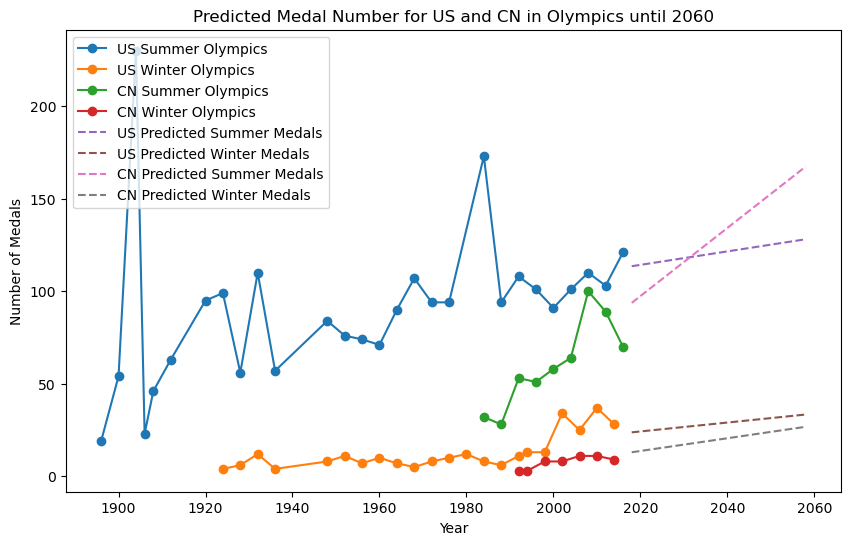

In [33]:
# Plot the prediction results
plt.figure(figsize=(10, 6))
plt.plot(US_summer_medals['Year'], US_summer_medals['Nums'], 'o-', label='US Summer Olympics')
plt.plot(US_winter_medals['Year'], US_winter_medals['Nums'], 'o-', label='US Winter Olympics')
plt.plot(CN_summer_medals['Year'], CN_summer_medals['Nums'], 'o-', label='CN Summer Olympics')
plt.plot(CN_winter_medals['Year'], CN_winter_medals['Nums'], 'o-', label='CN Winter Olympics')
plt.plot(US_future_years, US_predicted_summer_medals, '--', label='US Predicted Summer Medals')
plt.plot(US_future_years, US_predicted_winter_medals, '--', label='US Predicted Winter Medals')
plt.plot(CN_future_years, CN_predicted_summer_medals, '--', label='CN Predicted Summer Medals')
plt.plot(CN_future_years, CN_predicted_winter_medals, '--', label='CN Predicted Winter Medals')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Predicted Medal Number for US and CN in Olympics until 2060')
plt.legend()
plt.show()

#### Model 2: Predicting the number of athletes for US in Summer Olympics and Winter Olympics respectively until 2060

* Independent Variable: Year
* Dependent Variable: Number of athletes participating in the Olympics
* Test/Prediction Methodology: Linear Regression

In [35]:
US_athlete = US_data.groupby(['Year', 'Season'])['Name'].nunique().reset_index()
US_athlete.columns = ['Year', 'Season', 'Nums']                                      
US_athlete = US_athlete.sort_values(by="Year" , ascending=True)

US_summer_athletes = US_athlete[US_athlete['Season'] == 'Summer']
US_winter_athletes = US_athlete[US_athlete['Season'] == 'Winter']

# Train models
US_summer_athlete_model = LinearRegression()
US_summer_athlete_model.fit(US_summer_athletes['Year'].values.reshape(-1, 1), US_summer_athletes['Nums'].values.reshape(-1, 1))

US_winter_athlete_model = LinearRegression()
US_winter_athlete_model.fit(US_winter_athletes['Year'].values.reshape(-1, 1), US_winter_athletes['Nums'].values.reshape(-1, 1))

# Predict until 2060
US_predicted_summer_athletes = US_summer_athlete_model.predict(US_future_years.reshape(-1, 1))
US_predicted_winter_athletes = US_winter_athlete_model.predict(US_future_years.reshape(-1, 1))

In [36]:
CN_athlete = CN_data.groupby(['Year', 'Season'])['Name'].nunique().reset_index()
CN_athlete.columns = ['Year', 'Season', 'Nums']                                      
CN_athlete = CN_athlete.sort_values(by="Year" , ascending=True)

CN_summer_athletes = CN_athlete[CN_athlete['Season'] == 'Summer']
CN_winter_athletes = CN_athlete[CN_athlete['Season'] == 'Winter']

# Train models
CN_summer_athlete_model = LinearRegression()
CN_summer_athlete_model.fit(CN_summer_athletes['Year'].values.reshape(-1, 1), CN_summer_athletes['Nums'].values.reshape(-1, 1))

CN_winter_athlete_model = LinearRegression()
CN_winter_athlete_model.fit(CN_winter_athletes['Year'].values.reshape(-1, 1), CN_winter_athletes['Nums'].values.reshape(-1, 1))

# Predict until 2060
CN_predicted_summer_athletes = CN_summer_athlete_model.predict(CN_future_years.reshape(-1, 1))
CN_predicted_winter_athletes = CN_winter_athlete_model.predict(CN_future_years.reshape(-1, 1))

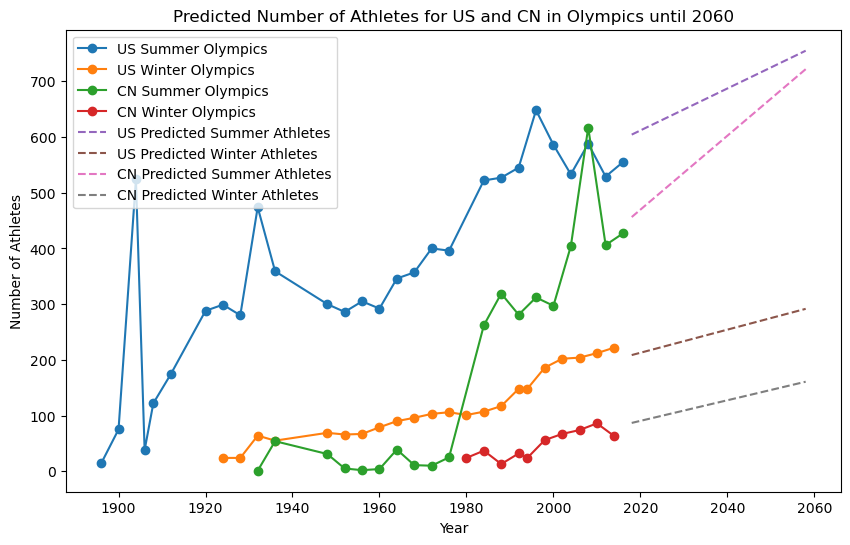

In [37]:
# Plot the prediction results
plt.figure(figsize=(10, 6))
plt.plot(US_summer_athletes['Year'], US_summer_athletes['Nums'], 'o-', label='US Summer Olympics')
plt.plot(US_winter_athletes['Year'], US_winter_athletes['Nums'], 'o-', label='US Winter Olympics')
plt.plot(CN_summer_athletes['Year'], CN_summer_athletes['Nums'], 'o-', label='CN Summer Olympics')
plt.plot(CN_winter_athletes['Year'], CN_winter_athletes['Nums'], 'o-', label='CN Winter Olympics')
plt.plot(US_future_years, US_predicted_summer_athletes, '--', label='US Predicted Summer Athletes')
plt.plot(US_future_years, US_predicted_winter_athletes, '--', label='US Predicted Winter Athletes')
plt.plot(CN_future_years, CN_predicted_summer_athletes, '--', label='CN Predicted Summer Athletes')
plt.plot(CN_future_years, CN_predicted_winter_athletes, '--', label='CN Predicted Winter Athletes')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Predicted Number of Athletes for US and CN in Olympics until 2060')
plt.legend()
plt.show()

From the prediction results we can see that although United States is ahead of China so far in terms of both number of medals and participants, in the future China seems to have a tendency to overtake the US in both parts.

**So be careful United States, Chinese are catching up!**